## PyTorch 简介
    
 <br>
 PyTorch官方对于PyTorch的定位为：

    一个使用GPU加速的numpy替换库
    一个深度学习研究平台，提高最大灵活度和速度
    
        PyTorch支持动态计算图，能够提供线上操作，这在定义网络上操作更简单，静态图需要一个个操作声明，而动态图可以调用各种函数。并且因为是动态图，在改变网络的某一层或者改变一些变量，例如动态修改学习率。
        PyTorch非常适合调用新模型，用于设计自己的架构，测试新想法
        许多新的模型是使用PyTorch实现的
    
 <br>
   * variable
   * regression
   * activation
   * optimizer
   * build nn
   * CNN
   * RNN
   * model save/load

&emsp;&emsp;<https://pytorch.org/docs/stable/torch.html><br> 
&emsp;&emsp;<https://morvanzhou.github.io/tutorials/machine-learning/torch/>     




### variable

In [3]:
import torch
import numpy as np

# numpy 与 tensor的转换
np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    'numpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)


numpy array: [[0 1 2]
 [3 4 5]] 
torch tensor: tensor([[ 0,  1,  2],
        [ 3,  4,  5]], dtype=torch.int32) 
tensor to array: [[0 1 2]
 [3 4 5]]


In [4]:
# 相关运算  https://pytorch.org/docs/stable/tensors.html

# abs
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)  # 32-bit floating point
print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)



abs 
numpy:  [1 2 1 2] 
torch:  tensor([ 1.,  2.,  1.,  2.])


In [7]:
# mean
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)  # 32-bit floating point
print(
    'mean',
    '\nnumpy: ', np.mean(data),         # 0.0
    '\ntorch: ', torch.mean(tensor)     # 0.0
)

mean 
numpy:  0.0 
torch:  tensor(0.)


In [21]:
# dim
data = [-1, -2, 1, 2, 5, 7, 8, -1, 1]
tensor = torch.FloatTensor(data)  # 32-bit floating point
tensor = tensor.view(3,3)
print (tensor)
print( "torch.sum(tensor, 0) = ",torch.sum(tensor, 0) )
print( "torch.sum(tensor, 1) = ",torch.sum(tensor, 1) )

print( "torch.max(tensor, 0) = ",torch.max(tensor, 0, keepdim = True) )  # 返回值      位置
print( "torch.max(tensor, 1) = ",torch.max(tensor, 1) )


tensor([[-1., -2.,  1.],
        [ 2.,  5.,  7.],
        [ 8., -1.,  1.]])
torch.sum(tensor, 0) =  tensor([ 9.,  2.,  9.])
torch.sum(tensor, 1) =  tensor([ -2.,  14.,   8.])
torch.max(tensor, 0) =  (tensor([[ 8.,  5.,  7.]]), tensor([[ 2,  1,  1]]))
torch.max(tensor, 1) =  (tensor([ 1.,  7.,  8.]), tensor([ 2,  2,  0]))


In [8]:
# matrix multiplication
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)  # 32-bit floating point
# correct method
print(
    '\nmatrix multiplication (matmul)',
    '\nnumpy: ', np.matmul(data, data),     # [[7, 10], [15, 22]]
    '\ntorch: ', torch.mm(tensor, tensor)   # [[7, 10], [15, 22]]
)


matrix multiplication (matmul) 
numpy:  [[ 7 10]
 [15 22]] 
torch:  tensor([[  7.,  10.],
        [ 15.,  22.]])


In [18]:
# incorrect method
# tensor = torch.tensor([1,2,3,4])
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)  # 32-bit floating point
data = np.array(data)
print(
    '\nmatrix multiplication (dot)',
    '\nnumpy: ', data.dot(data),        # [[7, 10], [15, 22]]
    '\ntorch: ', tensor.dot(tensor)     # tensor.dot 只支持 一维的数据
                                        # 
)

RuntimeError: Expected argument self to have 1 dimension, but has 2

In [25]:
from torch.autograd import Variable
#https://blog.csdn.net/KGzhang/article/details/77483383
#Variable可以看作是对Tensor对象周围的一个薄包装，也包含了和张量相关的梯度，以及对创建它的函数的引用。
#需要反向传播的网络 都是通过variable来计算的

tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor, requires_grad=True)

print(tensor, type(tensor))
print(variable.data, type(variable) )

t_out = torch.mean(tensor*tensor)       # x^2
v_out = torch.mean(variable*variable)   # x^2
print(t_out)
print(v_out)    # 7.5

# t_out.backward()
v_out.backward()
print(variable.grad)

#variable -> numpy
np_data = variable.data.numpy()

tensor([[ 1.,  2.],
        [ 3.,  4.]]) <class 'torch.Tensor'>
tensor([[ 1.,  2.],
        [ 3.,  4.]]) <class 'torch.Tensor'>
tensor(7.5000)
tensor(7.5000)
tensor([[ 0.5000,  1.0000],
        [ 1.5000,  2.0000]])


#### regression

In [29]:
import torch
import torch.nn.functional as F     # 激励函数都在这

# 训练数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# print(x)
# print(y)



# PyTorch 里编写神经网络 所有的层结构和损失函数都来自于 torch.nn
# 所有的模型构建都是从基类 nn.Module 继承的
class Net(torch.nn.Module ):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden, bias = True)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output, bias = True)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)  # 1 -> 10 -> 1
print(net)


# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)


for t in range(100):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值

    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    if t % 10 == 0:
        print("loss = ",loss)



test = torch.unsqueeze(torch.Tensor([1,2,3,4,5]), dim = 1)

# print(net(test))


# print(net.parameters())

# for param in net.parameters():
# #      print(type(param.data), param.size())
#      print(list(param.data))
    
# z1 = (W1 * x + b1)     
# y = (W2 * z1 + b2)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
loss =  tensor(0.1073)
loss =  tensor(1.00000e-02 *
       7.3093)
loss =  tensor(1.00000e-02 *
       5.5702)
loss =  tensor(1.00000e-02 *
       4.2010)
loss =  tensor(1.00000e-02 *
       3.1122)
loss =  tensor(1.00000e-02 *
       2.2895)
loss =  tensor(1.00000e-02 *
       1.7146)
loss =  tensor(1.00000e-02 *
       1.3385)
loss =  tensor(1.00000e-02 *
       1.1030)
loss =  tensor(1.00000e-03 *
       9.5837)


### activation
    神经网络中激活函数的主要作用是提供网络的非线性建模能力
<https://zhuanlan.zhihu.com/p/22142013>(激活函数的作用及发展)

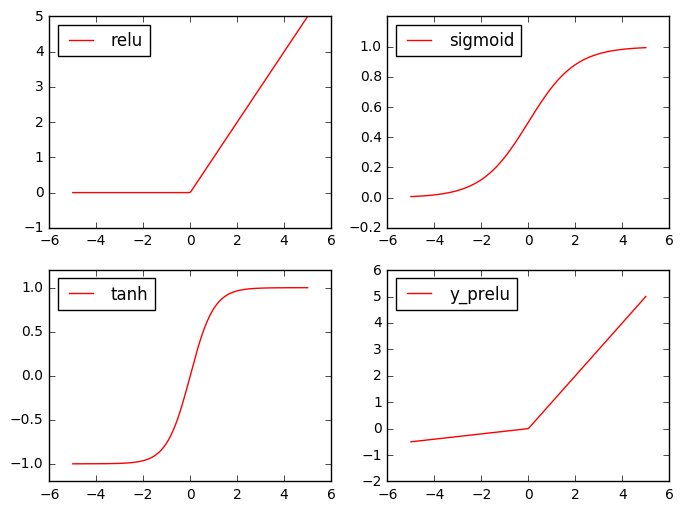

In [31]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

# fake data
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
# print(x)
x = Variable(x)
x_np = x.data.numpy()   # numpy array for plotting

# following are popular activation functions
y_relu = F.relu(x).data.numpy()
# print(y_relu)
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
# y_softplus = F.softplus(x).data.numpy()

prelu = torch.nn.PReLU(init=0.1)
y_prelu = prelu(x).data.numpy()
# y_softmax = F.softmax(x)  softmax is a special kind of activation function, it is about probability
# F.prelu(x).data.numpy()


# plt to visualize these activation function
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_prelu, c='red', label='y_prelu')
plt.ylim((-2, 6))
plt.legend(loc='best')

plt.show()



最早的激活函数 Sigmoid  
tanh 网络的收敛速度要比sigmoid快  但两种激活函数都存在饱和现象<br>
ReLU 在 x < 0 时存在硬饱和, x > 0 时导数为1 能够缓解梯度消失的问题  但存在神经元死亡的现象<br>
PRelu 具有非饱和性<br> 
ELU、MPELU

### optimizer
<https://blog.csdn.net/u014595019/article/details/52989301>(各种优化器的介绍)

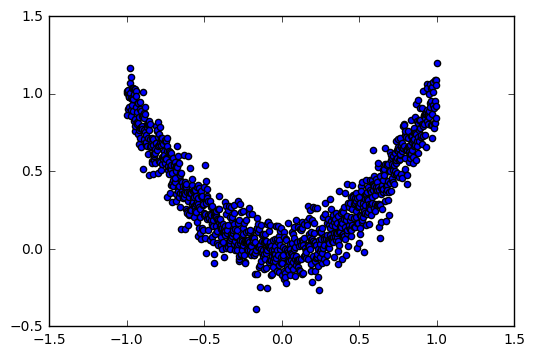

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9


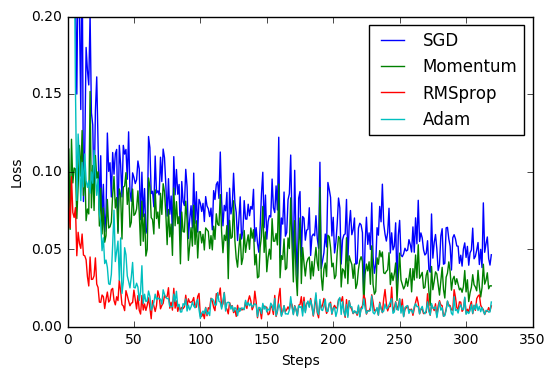

In [60]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

LR = 0.01
BATCH_SIZE = 32
EPOCH = 10

# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

# put dateset into torch dataset
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)


# default network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

if __name__ == '__main__':
    # different nets
    net_SGD         = Net()
    net_Momentum    = Net()
    net_RMSprop     = Net()
    net_Adam        = Net()
    nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

    # different optimizers
    opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
    opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
    opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
    opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
    optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

    loss_func = torch.nn.MSELoss()
    losses_his = [[], [], [], []]   # record loss

    # training
    for epoch in range(EPOCH):
        print('Epoch: ', epoch)
        for step, (b_x, b_y) in enumerate(loader):          # for each training step
            for net, opt, l_his in zip(nets, optimizers, losses_his):
                output = net(b_x)              # get output for every net
                loss = loss_func(output, b_y)  # compute loss for every net
                opt.zero_grad()                # clear gradients for next train
                loss.backward()                # backpropagation, compute gradients
                opt.step()                     # apply gradients
                l_his.append(loss.data.numpy())     # loss recoder

    labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
    for i, l_his in enumerate(losses_his):
        plt.plot(l_his, label=labels[i])
    plt.legend(loc='best')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.ylim((0, 0.2))
    plt.show()

## CNN
![title](img/cnn_cal.png)

torch.Size([60000, 28, 28])
torch.Size([60000])


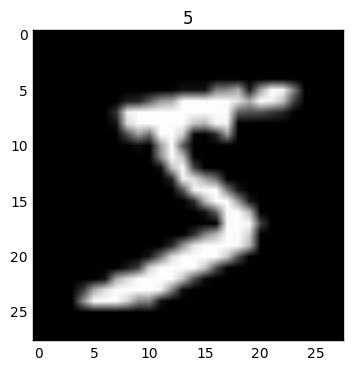

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
import os

import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate
DOWNLOAD_MNIST = False

# Mnist digits dataset
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
    # not mnist dir or mnist is empyt dir
    DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,
)

# plot one example
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)

plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]





class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization


cnn = CNN()
print(cnn)  # net architecture

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted


for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
#         print(b_x.size())               # [50, 1, 28, 28]
        output = cnn(b_x)[0]            # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

## RNN
![title](img/rnn_lstm.png)

torch.Size([60000, 28, 28])
torch.Size([60000])


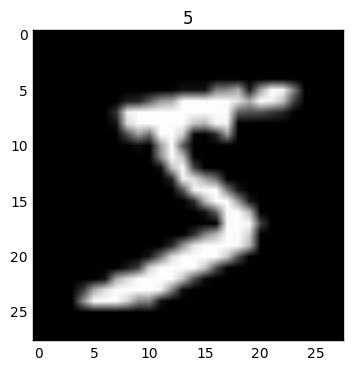

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)
Epoch:  0 | train loss: 2.3189 | test accuracy: 0.10
Epoch:  0 | train loss: 1.1254 | test accuracy: 0.48
Epoch:  0 | train loss: 0.8412 | test accuracy: 0.71
Epoch:  0 | train loss: 0.7230 | test accuracy: 0.77
Epoch:  0 | train loss: 0.3469 | test accuracy: 0.86
Epoch:  0 | train loss: 0.3975 | test accuracy: 0.88
Epoch:  0 | train loss: 0.3579 | test accuracy: 0.88
Epoch:  0 | train loss: 0.4541 | test accuracy: 0.92
Epoch:  0 | train loss: 0.4855 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1344 | test accuracy: 0.94
Epoch:  0 | train loss: 0.3967 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1559 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1483 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1248 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2699 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1085 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0348 | test accurac

In [66]:
import torch
from torch import nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = False   # set to True if haven't download the data


# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = test_data.test_data.type(torch.FloatTensor)[:2000]/255.   # shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy().squeeze()[:2000]    # covert to numpy array


class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn hidden layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])  #(batch, time_step, input_size)
        return out

# print (help(nn.LSTM))
rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):        # gives batch data
        b_x = b_x.view(-1, 28, 28)              # reshape x to (batch, time_step, input_size)

        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
            accuracy = float(sum(pred_y == test_y)) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)


# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()    #返回 one-hot中为1的坐标 间隔为1
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

# print("torch.max(test_output, 1) ", torch.max(test_output, 1))


### model save/load

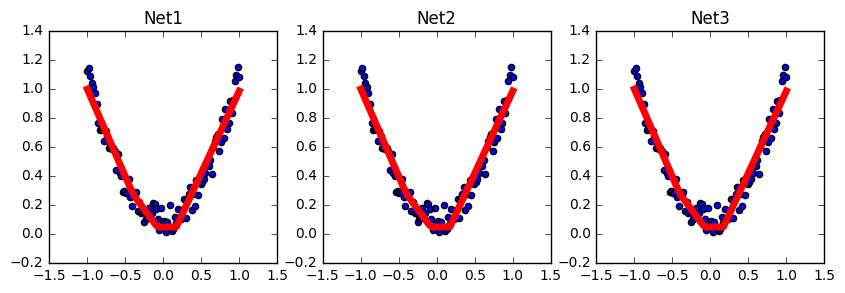

In [6]:
 
import torch
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters


def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)


def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

# save net1
save()

# restore entire net (may slow)
restore_net()

# restore only the net parameters
restore_params()
